# Google Play Store Apps Data Analysis (EDA)

### Used Libraries
1. NumPy (Numerical Python)
2. Pandas
3. Matplotlib
4. Seaborn
5. Plotly
6. Missingno

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pandas_profiling as pp
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv
/kaggle/input/google-play-store-apps/googleplaystore.csv


### Content:
1. Pandas Profiling Report
2. Missingno - Missing Data
3. Data Cleaning
4. Seaborn - Bar Plot
5. Plotly - Donut Chart
6. Plotly - Box Plot
7. Seaborn - Count Plot
8. Word Cloud

### Reading Data


In [2]:
df=pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")

In [3]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5806,Stickman and Axe,GAME,4.4,69,2.8M,"50,000+",Free,0,Teen,Action,"November 25, 2017",1.0,4.0.3 and up
9335,EGW Writings 2,BOOKS_AND_REFERENCE,4.7,6547,16M,"100,000+",Free,0,Everyone,Books & Reference,"December 8, 2017",4.0.3,4.0.3 and up
6631,BQ Scan,TOOLS,4.6,18,4.0M,100+,Free,0,Everyone,Tools,"April 1, 2018",3.4.5,4.0 and up
7774,DCUO|CR Calculator Pro,TOOLS,4.6,82,1.7M,500+,Paid,$0.99,Everyone,Tools,"August 14, 2017",3.3,3.0 and up
6670,Texas Bar-B-Q Rewards,FOOD_AND_DRINK,NaN,0,14M,5+,Free,0,Everyone,Food & Drink,"March 28, 2018",2.0.24,4.1 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Pandas Profiling Report

In [6]:
report = pp.ProfileReport(df)

report.to_file("report.html")

report

# Missingno - Missing Data

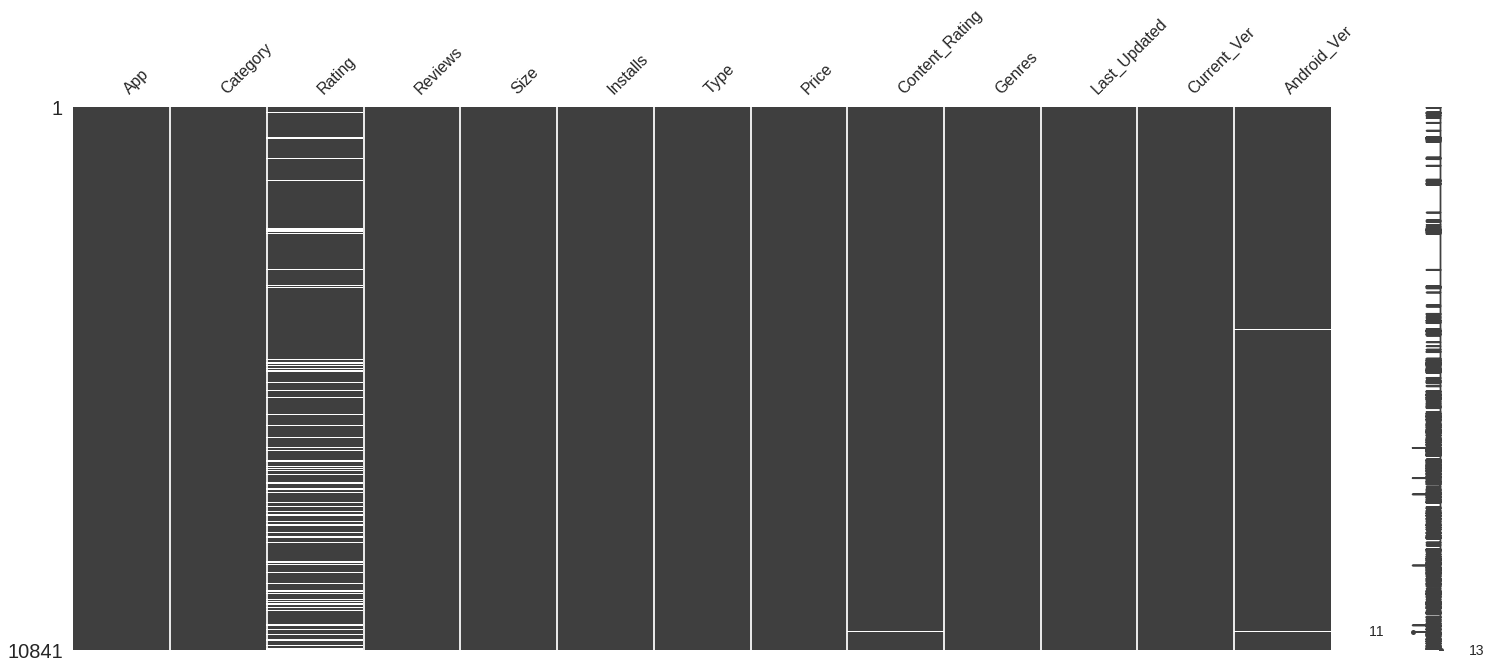

In [7]:
import missingno as msno
msno.matrix(df)
plt.show()

# Data Cleaning

In [8]:
df.columns=[each.replace(" ","_") for each in df.columns]

In [9]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [10]:
df["Category"]=[each.replace("_"," ") for each in df.Category]
df["Price"]=[str(each.replace("$","")) for each in df.Price]

In [11]:

df.Reviews = pd.to_numeric(df.Reviews, errors='coerce')
df.Price = pd.to_numeric(df.Price, errors='coerce')
df.Rating = pd.to_numeric(df.Rating, errors='coerce')

# Seaborn - Bar Plot

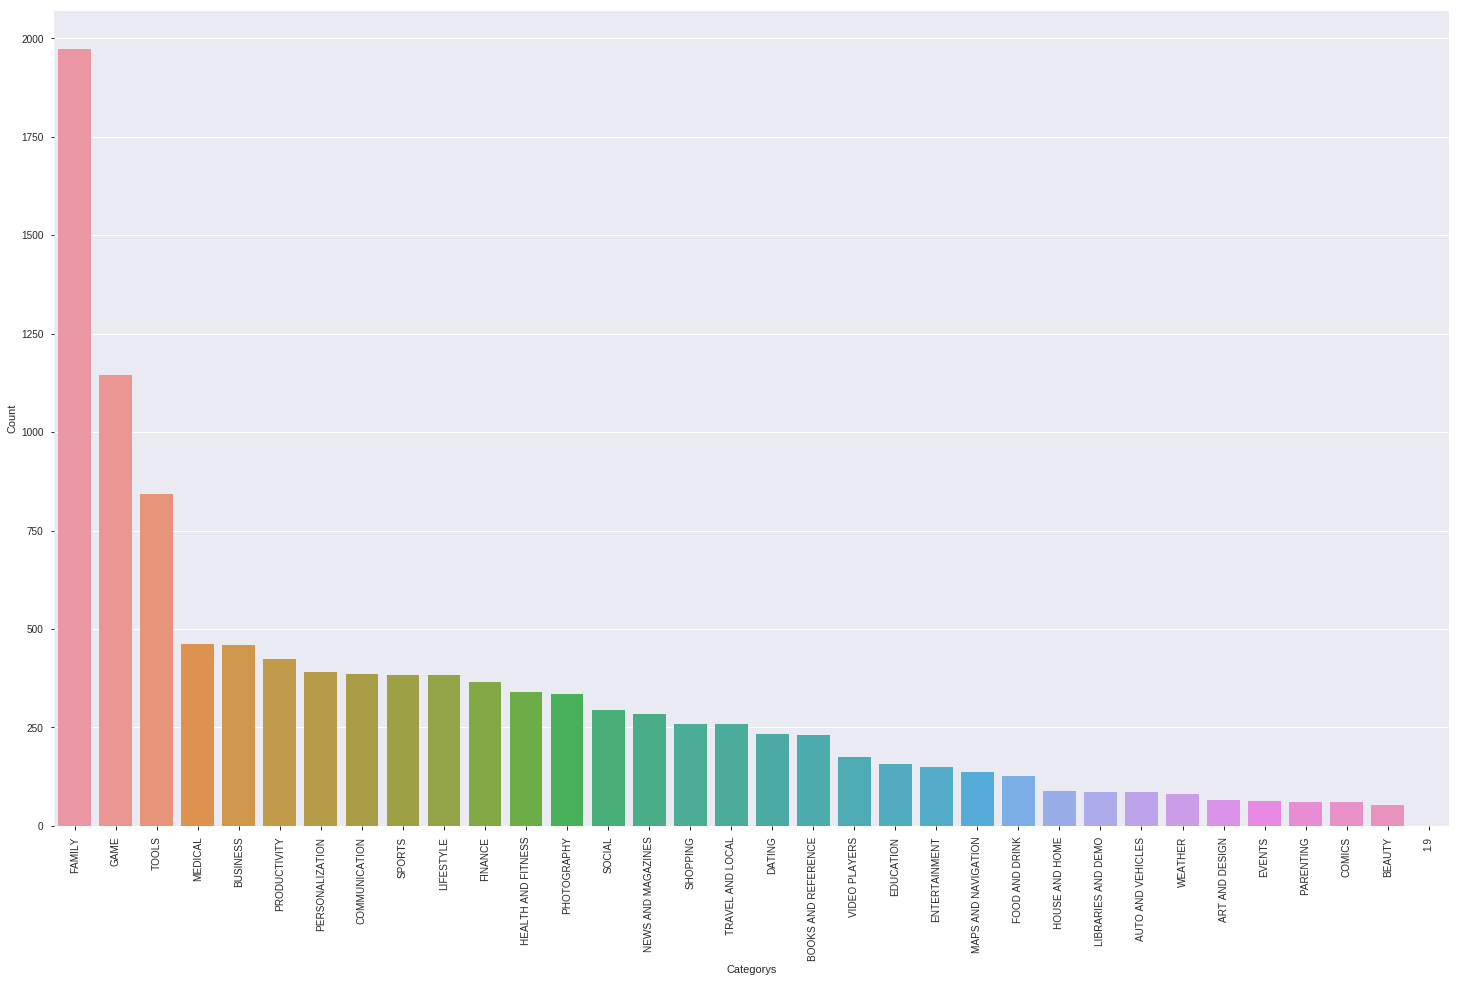

In [12]:
df2 = pd.DataFrame(columns = ['Category'])
df2["Category"]=[each for each in df.Category.unique()]
df2["Count"]=[len(df[df.Category==each]) for each in df2.Category]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df2.Category, y=df2.Count)
plt.xticks(rotation= 90)
plt.xlabel('Categorys')
plt.ylabel('Count')
plt.show()

# Plotly - Donut Chart ( Interactive )
### Google Play Apps Android Versiyon Ratio

In [13]:
labels = df.Android_Ver.unique()
values=[]
for each in labels:
    values.append(len(df[df.Android_Ver==each]))

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

# Plotly - Box Plot ( Interactive )
### Game, Family and Medical Category (min,q1,median,q3,max value)

In [14]:
Category1 = df[df.Category=="GAME"].Rating
Category2 = df[df.Category=="FAMILY"].Rating
Category3 = df[df.Category=="MEDICAL"].Rating

fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=Category1, name='GAME'))
fig.add_trace(go.Box(x=Category2, name='FAMILY'))
fig.add_trace(go.Box(x=Category3, name='MEDICAL'))

fig.show()

# Seaborn - Count Plot

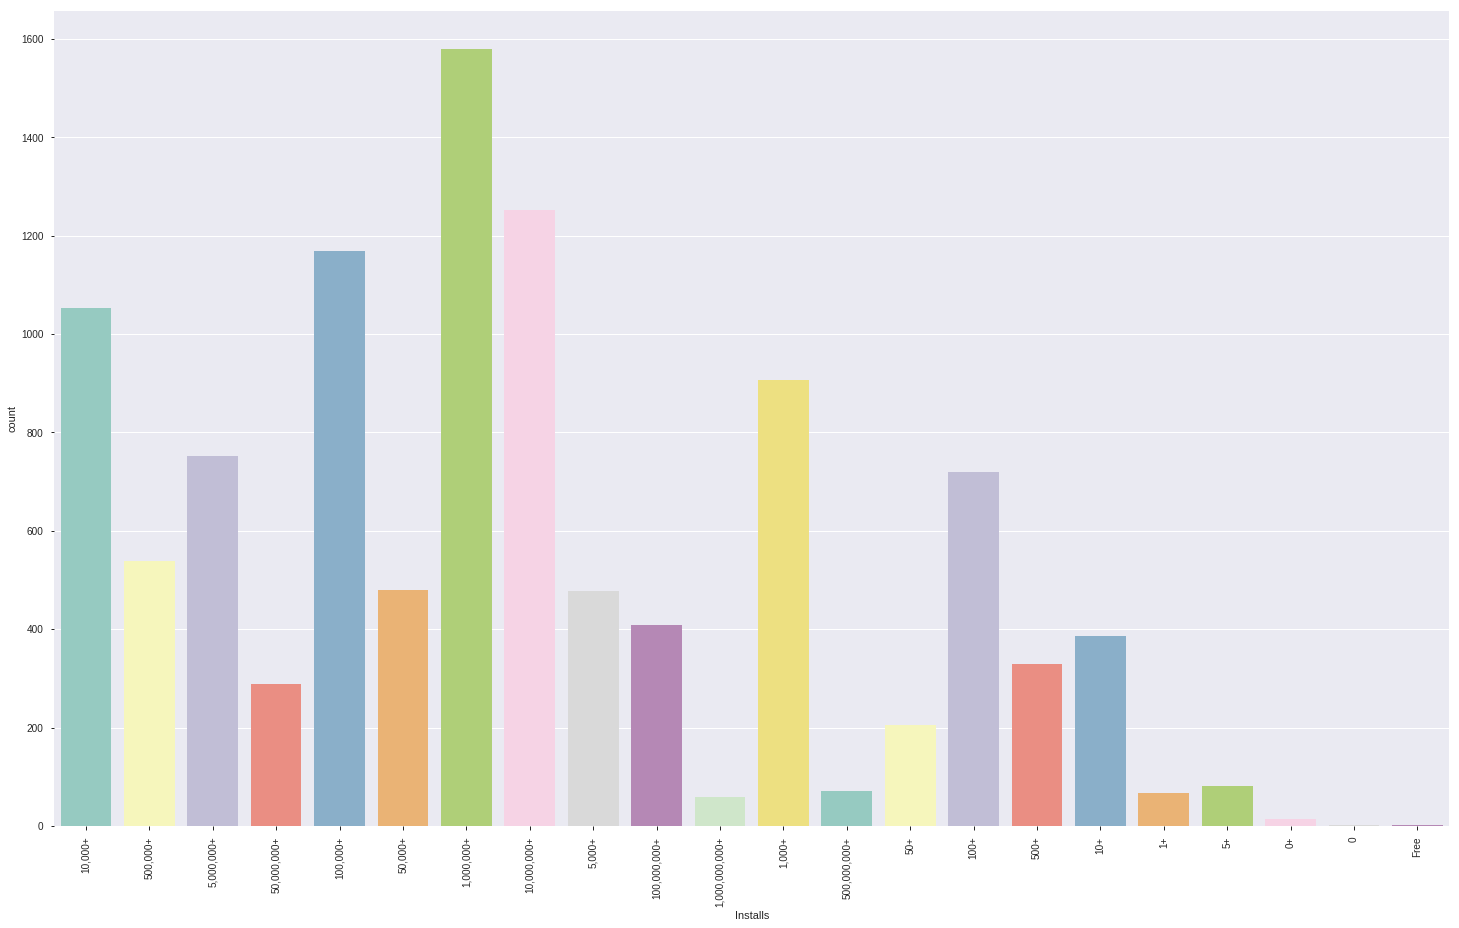

In [15]:
plt.subplots(figsize=(25,15))
plt.xticks(rotation=90)
ax = sns.countplot(x="Installs", data=df, palette="Set3")

# Word Cloud

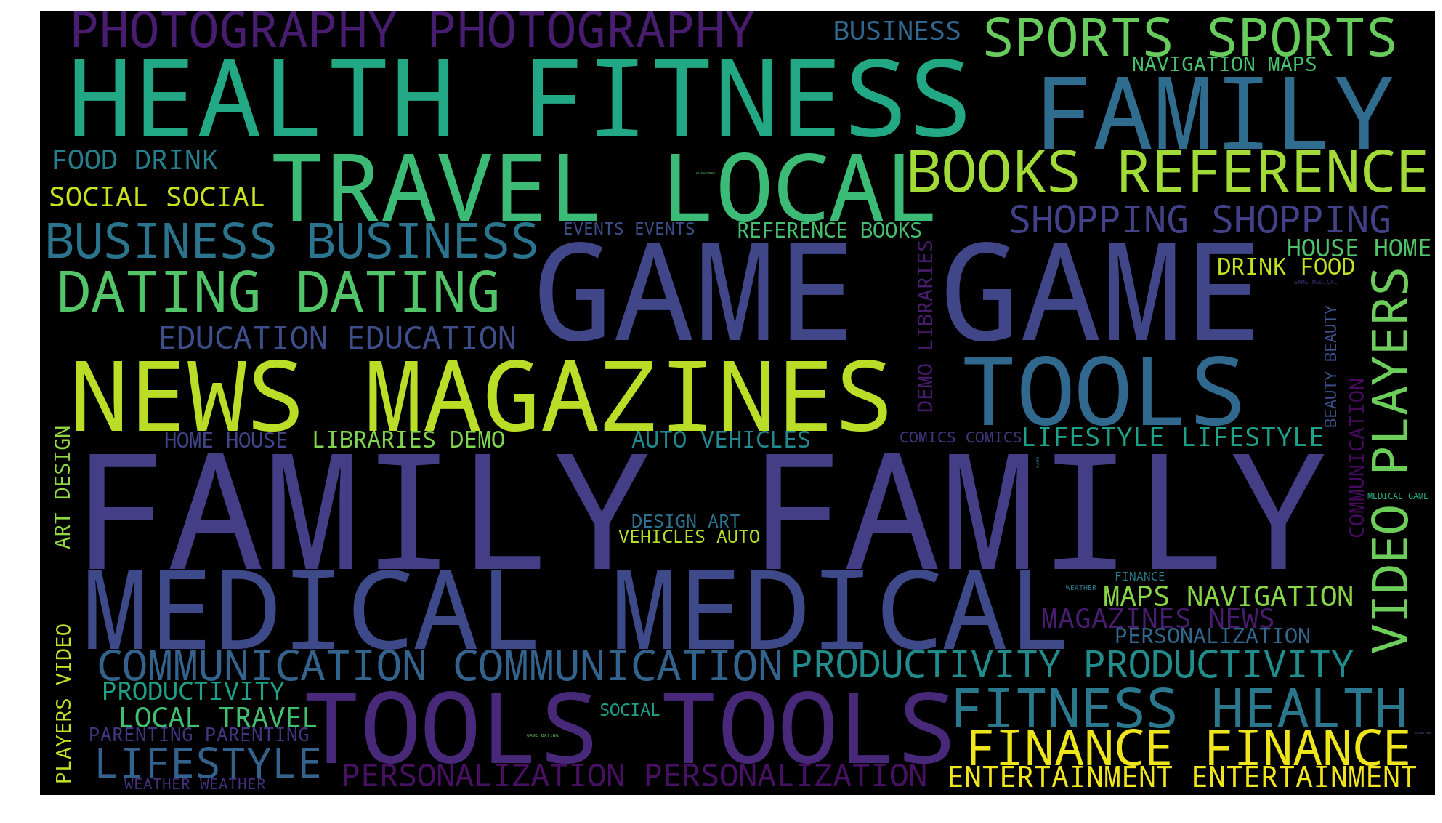

In [16]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

# Thank You

If you have any suggestion or advice or feedback, I will be very appreciated to hear them.
### Also there are other kernels
* [FIFA 19 Player Data Analysis and Visualization EDA](https://www.kaggle.com/ismailsefa/f-fa-19-player-data-analysis-and-visualization-eda)
* [Crimes Data Analysis and Visualzation (EDA)](https://www.kaggle.com/ismailsefa/crimes-data-analysis-and-visualzation-eda)
* [Google Play Store Apps Data Analysis (EDA)](https://www.kaggle.com/ismailsefa/google-play-store-apps-data-analysis-eda)
* [World Happiness Data Analysis and Visualization](https://www.kaggle.com/ismailsefa/world-happiness-data-analysis-and-visualization)
* [Used Cars Data Analysis and Visualization (EDA)](https://www.kaggle.com/ismailsefa/used-cars-data-analysis-and-visualization-eda)
* [Gender Recognition by Voice Machine Learning SVM](https://www.kaggle.com/ismailsefa/gender-recognition-by-voice-machine-learning-svm)
* [Iris Species Classify Machine Learning KNN](https://www.kaggle.com/ismailsefa/iris-species-classify-machine-learning-knn)
* [Breast Cancer Diagnostic Machine Learning R-Forest](https://www.kaggle.com/ismailsefa/breast-cancer-diagnostic-machine-learning-r-forest)
* [Heart Disease Predic Machine Learning Naive Bayes](https://www.kaggle.com/ismailsefa/heart-disease-predic-machine-learning-naive-bayes)
* [Mushroom Classify Machine Learning Decision Tree](https://www.kaggle.com/ismailsefa/mushroom-classify-machine-learning-decision-tree)